In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
from scipy.stats import sem, linregress

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Water File to Load
H2ODataFile = "../1_Input/DF_Interim/water_perCountry.csv"

# Load to dataframe
H2O_data = pd.read_csv(H2ODataFile)

H2O_data.head()

,Country,% Access,Total water withdrawal per capita (m³ per person per year)
0,Afghanistan,36.228000,1355.433333
1,Albania,95.750002,464.733333
2,Algeria,88.376923,161.857143
3,American Samoa,97.984726,NaN
4,Andorra,100.000000,NaN


In [3]:
# Violence File to Load
ViolenceDataFile = "../1_Input/DF_Interim/violence2_perCountry.csv"

# Load to dataframe
violence_data = pd.read_csv(ViolenceDataFile)

violence_data.head()


,Country,Population,Conflict Count,Conflict Deaths,Homocide Count,Homocide Rate,Conflict Death Rate
0,Afghanistan,32956936,2425.0,18714.0,712.0,2.4,56.783191
1,Albania,2900114,NaN,NaN,1542.0,49.9,NaN
2,Algeria,40026405,248.0,1178.0,516.0,1.5,2.943057
3,Angola,25426102,129.0,2154.0,3426.0,19.0,8.471609
4,Antigua and Barbuda,92279,NaN,NaN,17.0,19.8,NaN


In [4]:
# Merge tables
water_vs_violence = pd.merge(H2O_data, violence_data, how="outer", on="Country")


wv_df = water_vs_violence.dropna()

wv_df.head()


,Country,% Access,Total water withdrawal per capita (m³ per person per year),Population,Conflict Count,Conflict Deaths,Homocide Count,Homocide Rate,Conflict Death Rate
0,Afghanistan,36.228000,1355.433333,32956936.0,2425.0,18714.0,712.0,2.4,56.783191
2,Algeria,88.376923,161.857143,40026405.0,248.0,1178.0,516.0,1.5,2.943057
5,Angola,46.453846,41.073333,25426102.0,129.0,2154.0,3426.0,19.0,8.471609
8,Armenia,94.862499,905.800000,3022275.0,8.0,16.0,116.0,3.6,0.529403
12,Azerbaijan,76.661539,1366.750000,9812656.0,43.0,137.0,206.0,2.2,1.396156


slope:  -2.5744784689044193
R-squared: 0.018417629983284323


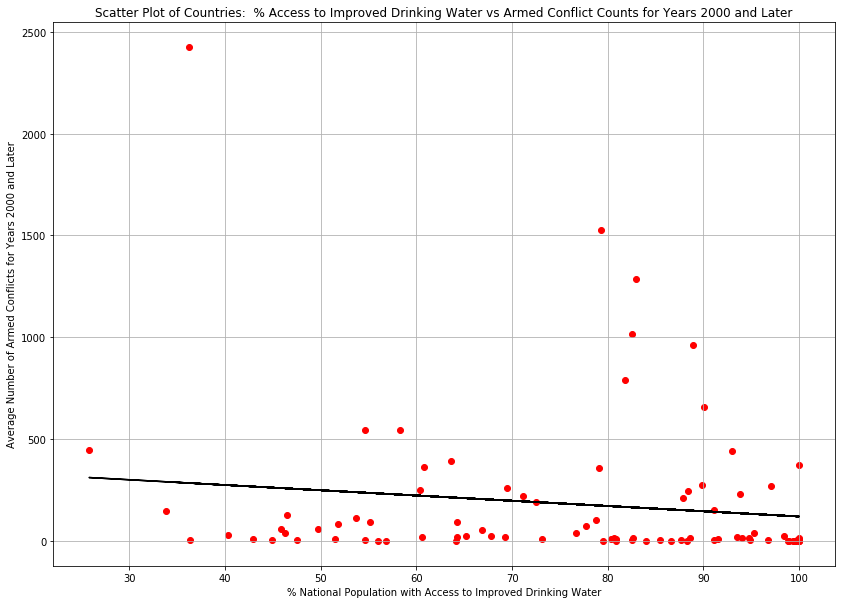

In [26]:
# Create scatterplot of % Access vs Conflict Count

x = wv_df["% Access"]
y = wv_df["Conflict Count"]

plt.scatter(x, y, color='r')
plt.title('Scatter Plot of Countries:  % Access to Improved Drinking Water vs Armed Conflict Counts for Years 2000 and Later')
plt.xlabel("% National Population with Access to Improved Drinking Water")
plt.ylabel("Average Number of Armed Conflicts for Years 2000 and Later")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"k")

slope, intercept, r_value, p_value, std_err = linregress(x,y)
print("slope: ", slope)
print("R-squared:", r_value*r_value)


plt.grid()

plt.gcf().set_size_inches(14, 10)

# Save the Figure
plt.savefig("../6_Output/Percent Access Improved Water vs Armed Conflict_JT.png")

# Show the Figure
plt.show()

slope:  -0.31774532238424696
R-squared: 0.07304407842845331


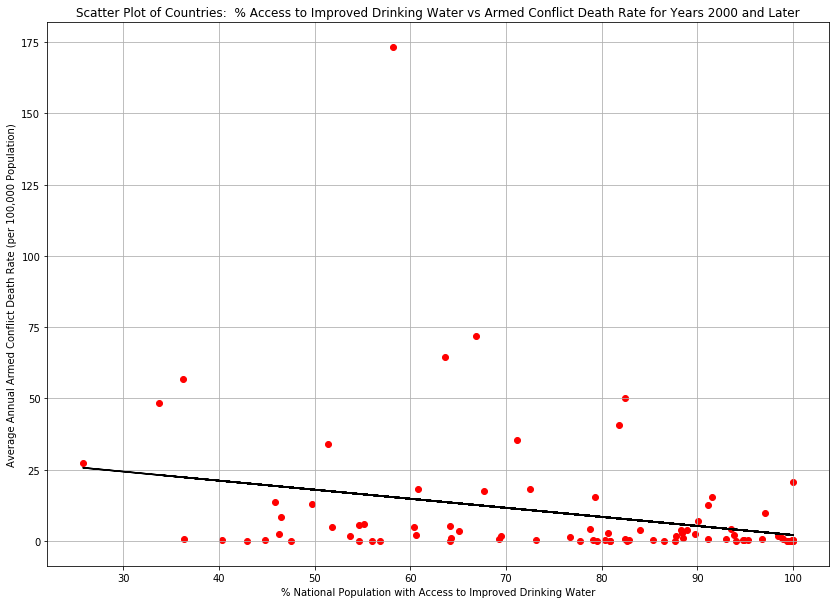

In [27]:
# Create scatterplot of % Access vs Conflict Death Rate

x = wv_df["% Access"]
y = wv_df["Conflict Death Rate"]


plt.scatter(x, y, color='r')
plt.title('Scatter Plot of Countries:  % Access to Improved Drinking Water vs Armed Conflict Death Rate for Years 2000 and Later')
plt.xlabel("% National Population with Access to Improved Drinking Water")
plt.ylabel("Average Annual Armed Conflict Death Rate (per 100,000 Population)")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"k")

slope, intercept, r_value, p_value, std_err = linregress(x,y)
print("slope: ", slope)
print("R-squared:", r_value*r_value)


plt.grid()

plt.gcf().set_size_inches(14, 10)

# Save the Figure
plt.savefig("../6_Output/Percent Access Improved Water vs Armed Conflict Rate_JT.png")

# Show the Figure
plt.show()

slope:  -0.08558267316701877
R-squared: 0.00995250262067458


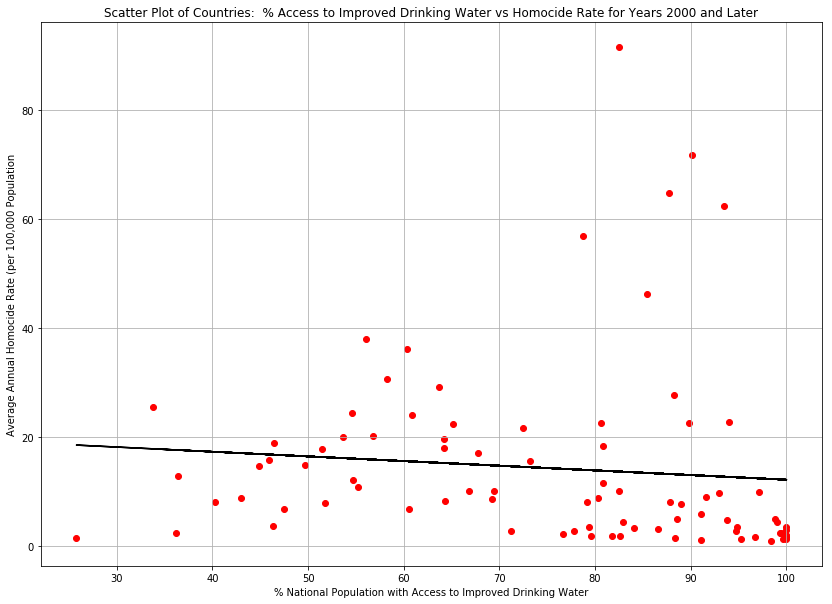

In [28]:
# Create scatterplot of % Access vs Homocide Rate

x = wv_df["% Access"]
y = wv_df["Homocide Rate"]

plt.scatter(x, y, color='r')
plt.title('Scatter Plot of Countries:  % Access to Improved Drinking Water vs Homocide Rate for Years 2000 and Later')
plt.xlabel("% National Population with Access to Improved Drinking Water")
plt.ylabel("Average Annual Homocide Rate (per 100,000 Population")

plt.grid()

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"k")

slope, intercept, r_value, p_value, std_err = linregress(x,y)
print("slope: ", slope)
print("R-squared:", r_value*r_value)

plt.gcf().set_size_inches(14, 10)

# Save the Figure
plt.savefig("../6_Output/Percent Access Improved Water vs Homocide Rate_JT.png")

# Show the Figure
plt.show()

slope:  0.14648742899295517
R-squared: 0.04505830149941386


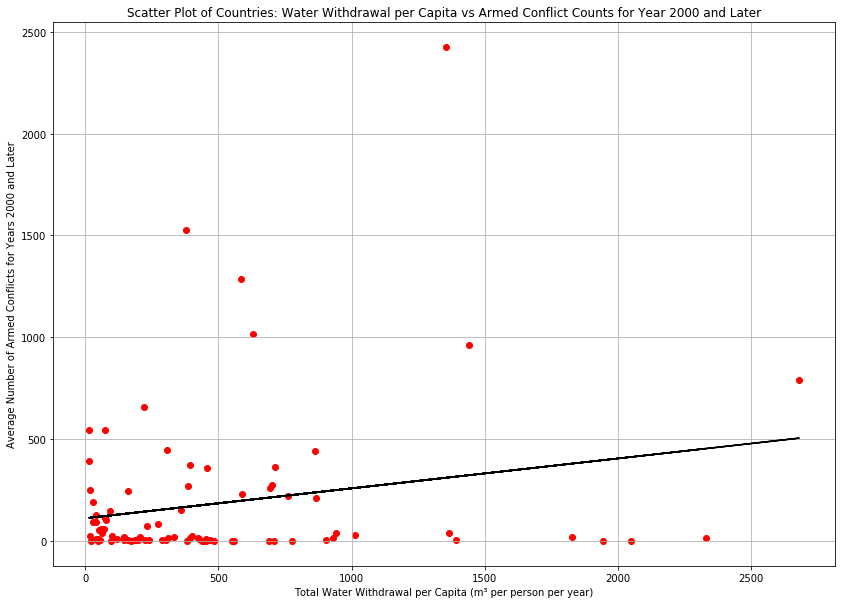

In [29]:
# Create scatterplot of Water Withdrawal per Capita vs Conflict Count

x = wv_df["Total water withdrawal per capita (m³ per person per year)"]
y = wv_df["Conflict Count"]

plt.scatter(x, y, color='r')
plt.title('Scatter Plot of Countries: Water Withdrawal per Capita vs Armed Conflict Counts for Year 2000 and Later')
plt.xlabel("Total Water Withdrawal per Capita (m³ per person per year)")
plt.ylabel("Average Number of Armed Conflicts for Years 2000 and Later")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"k")

slope, intercept, r_value, p_value, std_err = linregress(x,y)
print("slope: ", slope)
print("R-squared:", r_value*r_value)

plt.grid()

plt.gcf().set_size_inches(14, 10)

# Save the Figure
plt.savefig("../6_Output/Water Withdrawal per Capita vs Armed Conflict Counts_JT.png")

# Show the Figure
plt.show()

slope:  -0.002573747609140815
R-squared: 0.0036214082146303127


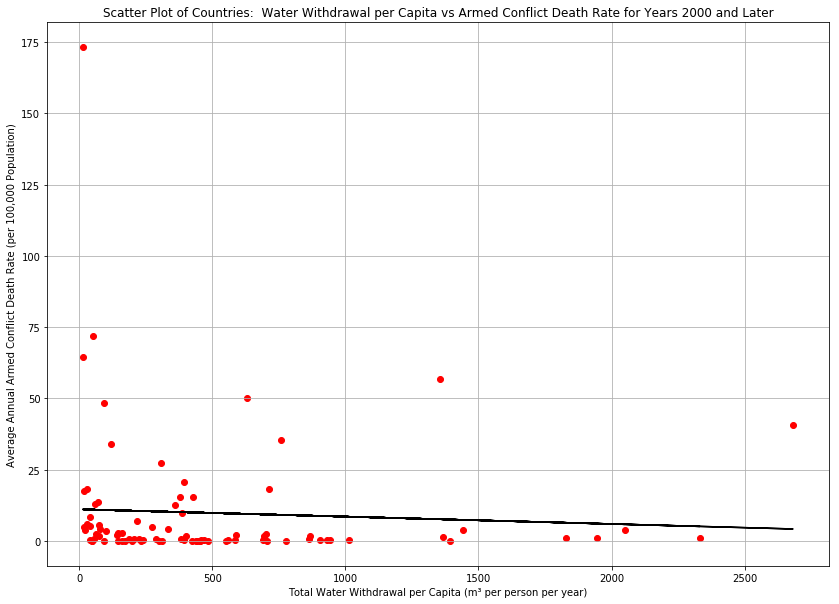

In [30]:
# Create scatterplot of Water Withdrawal per Capita vs Conflict Count

x = wv_df["Total water withdrawal per capita (m³ per person per year)"]
y = wv_df["Conflict Death Rate"]

plt.scatter(x, y, color='r')
plt.title('Scatter Plot of Countries:  Water Withdrawal per Capita vs Armed Conflict Death Rate for Years 2000 and Later')
plt.xlabel("Total Water Withdrawal per Capita (m³ per person per year)")
plt.ylabel("Average Annual Armed Conflict Death Rate (per 100,000 Population)")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"k")

slope, intercept, r_value, p_value, std_err = linregress(x,y)
print("slope: ", slope)
print("R-squared:", r_value*r_value)

plt.grid()

plt.gcf().set_size_inches(14, 10)

# Save the Figure
plt.savefig("../6_Output/Water Withdrawal per Capita vs Armed Conflict Death Rate_JT.png")

# Show the Figure
plt.show()

slope:  -0.008005554324255157
R-squared: 0.06580551785285986


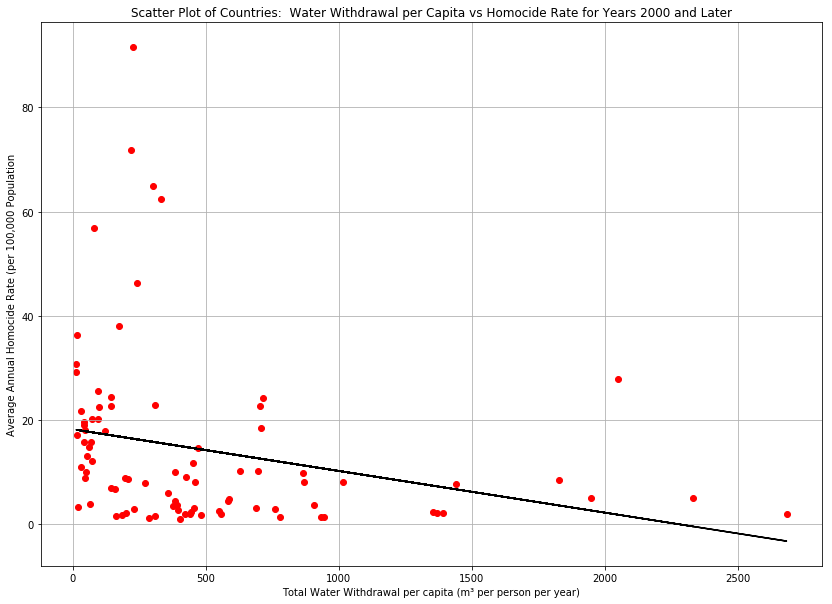

In [31]:
# Create scatterplot of Water Withdrawal per Capita vs Conflict Death Rte

x = wv_df["Total water withdrawal per capita (m³ per person per year)"]
y = wv_df["Homocide Rate"]

plt.scatter(x, y, color='r')
plt.title('Scatter Plot of Countries:  Water Withdrawal per Capita vs Homocide Rate for Years 2000 and Later')
plt.xlabel("Total Water Withdrawal per capita (m³ per person per year)")
plt.ylabel("Average Annual Homocide Rate (per 100,000 Population")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"k")

slope, intercept, r_value, p_value, std_err = linregress(x,y)
print("slope: ", slope)
print("R-squared:", r_value*r_value)

plt.grid()

plt.gcf().set_size_inches(14, 10)

# Save the Figure
plt.savefig("../6_Output/Water Withdrawal per Capita vs Homocide Rate_JT.png")

# Show the Figure
plt.show()